# 03 BMRA

Run BMRA based on global responses derived from the pathway activity predictions.

In [1]:
import pandas as pd
import numpy as np
import os
import bmra

In [2]:
cell_line = 'BC3C'

data_dir =f'/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_bmra/blca_publication_OUTPUT_bmra_{cell_line}/'
data_dir_1 = os.path.join(data_dir, f'00_outputs_2020_{cell_line}/')
data_dir_2 = os.path.join(data_dir, f'01_outputs_2020_{cell_line}/')

info_dir =f"/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_LINCS/00_outputs_2020_{cell_line}/"

out_dir = os.path.join(data_dir,f'02_outputs_2020_{cell_line}/')


os.makedirs(out_dir, exist_ok = True)

## Load data

### Global responses

Assembled from global responses calculated from predicted pathway activities, and DPD global responses.

In [3]:
def assemble_R_global(pathway_rglobal_file, dpd_rglobal_file):
    """
    Assemble full R_global matrix
    """
    R_global_modules_df = pd.read_csv(pathway_rglobal_file, index_col = 0)

    perts = R_global_modules_df.columns.tolist()

    R_global_DPD_df = pd.read_csv(dpd_rglobal_file, index_col=0).T

    # filter by perts list
    R_global_DPD_df = R_global_DPD_df[R_global_DPD_df.index.isin(perts)]

    # sort by perts list
    R_global_DPD_df["sort_col"] = R_global_DPD_df.index.map({val: i for i, val in enumerate(perts)})
    R_global_DPD_df = R_global_DPD_df.sort_values("sort_col")
    R_global_DPD_df = R_global_DPD_df.drop("sort_col", axis = 1)

    # transpose
    R_global_DPD_df = R_global_DPD_df.T

    R_global_df = pd.concat([R_global_modules_df, R_global_DPD_df])

    return R_global_df

In [4]:
R_global_df = assemble_R_global(
    pathway_rglobal_file = os.path.join(data_dir_2, "R_global_annotated.csv"),
    dpd_rglobal_file = os.path.join(data_dir_1, "R_global_DPDonly_annotated.csv"),
)

modules = R_global_df.index.tolist()
exp_ids = R_global_df.columns.tolist()

R_global = R_global_df.values
n_modules = R_global.shape[0]

print(R_global.shape)
display(R_global_df)

(14, 107)


,ASG002_BC3C_24H:A10,ASG002_BC3C_24H:A11,ASG002_BC3C_24H:A19,ASG002_BC3C_24H:A20,ASG002_BC3C_24H:A21,ASG002_BC3C_24H:B10,ASG002_BC3C_24H:B11,ASG002_BC3C_24H:B14,ASG002_BC3C_24H:B15,ASG002_BC3C_24H:C13,...,MOAR010_BC3C_24H:L20,MOAR011_BC3C_24H:C01,MOAR011_BC3C_24H:C02,MOAR011_BC3C_24H:C03,MOAR011_BC3C_24H:C10,MOAR011_BC3C_24H:C11,MOAR011_BC3C_24H:F07,MOAR011_BC3C_24H:F08,MOAR011_BC3C_24H:F09,MOAR011_BC3C_24H:J10
Androgen,-0.052455,-0.009148,0.001937,-0.039724,0.001781,0.019769,0.003990,0.016247,0.021265,0.036161,...,-0.044486,-0.015720,-0.001453,-0.009111,-0.052046,-0.004456,-0.054898,0.029468,0.026118,-0.587685
CDK1_2,-0.740124,-0.606127,0.082724,-0.084641,0.089618,-0.286336,0.031502,-0.286893,0.120831,0.064283,...,-0.014573,-0.012519,-0.117187,0.056421,-0.072967,-0.008869,-0.843978,0.112627,-0.053638,0.111144
CDK4_6,-0.025253,-0.233696,-0.041848,-0.515841,0.040598,0.002317,-0.007709,0.098412,0.085997,0.032184,...,-0.574798,0.048817,0.097616,-0.089236,-1.039905,-1.211545,0.318350,0.198992,-0.063215,-0.014645
EGFR,0.592259,0.492952,0.226333,0.364221,0.487503,0.110757,-0.411256,0.261696,0.283919,-0.048144,...,0.177629,0.041771,-0.057438,-0.037100,-0.088842,-0.424002,-0.448519,-0.554409,-0.313734,-0.227734
Estrogen,-0.124231,-0.207637,-0.209994,-0.409535,-0.945590,-0.310938,-0.085655,-0.236941,-0.162903,-0.040455,...,-0.082394,0.059883,0.040612,-0.011245,0.023317,0.134588,-1.508493,-0.226952,0.183926,-0.253958
FGFR,-0.097671,-0.186454,-0.088080,0.050895,-0.033554,-0.391863,-0.022104,-0.069243,-0.074836,-0.279904,...,0.165802,0.000337,0.081908,0.017082,0.060426,-0.343713,-0.528144,0.062253,0.242403,0.077665
PI3K,-1.905733,-1.691061,-1.427599,-1.243824,-0.707364,0.296333,-0.146641,-0.192071,-0.856527,-0.277710,...,-0.033147,-0.176988,-0.048641,-0.519026,-0.515285,0.009209,-0.825105,0.220407,-0.234555,0.006711
p53,-0.227816,-0.249853,-0.134207,-0.408271,0.048730,-1.630662,-1.475214,-0.119662,-0.081140,-1.328435,...,-0.323656,0.247284,0.026732,0.246185,0.186164,0.300838,-0.227291,-0.049827,0.030888,0.596414
TOP2A,-0.226692,0.075102,-0.235000,-0.172096,-0.126577,0.054543,0.072110,-1.995760,-0.205164,-0.287674,...,0.052978,0.099322,0.077347,-0.178076,-0.523397,0.049836,-0.752976,-0.009539,-0.033156,-0.439699
Src,-0.923716,-1.667888,0.524297,-1.207418,0.572451,-1.119442,0.495526,0.397873,0.397281,0.448248,...,0.076092,-0.204775,0.057268,0.057415,-0.105558,0.001541,0.035543,0.242847,0.775984,-0.162424


In [5]:
print(R_global_df.values.min())
print(R_global_df.values.max())

-141.3271606788109
29.670527998775157


### Perturbation matrix

In [6]:
inhib_conc_df = pd.read_csv(os.path.join(data_dir_1, "inhib_conc_annotated.csv"), index_col = 0)
#LFC_PLCg = pd.read_csv(os.path.join(info_dir,"PLCg_Data_log_2020.csv"),index_col=0)
#inhib_conc = inhib_conc_df.drop(columns=LFC_PLCg.index).values
inhib_conc = inhib_conc_df.values

n_DPDs = R_global.shape[0] - inhib_conc.shape[0]

pert_modules = np.where(inhib_conc != 0, 1, 0)
pert_DPD = np.zeros((n_DPDs, len(exp_ids)))

pert = np.vstack([pert_modules, pert_DPD])

print(pert.shape)
print(pert)

(14, 107)
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Networks

In [7]:
# empty prior
#G_prior = np.zeros((n_modules, n_modules))
G_prior_df = pd.read_excel(os.path.join(info_dir, "ALL_DATA_2020_july_25.xlsx"), sheet_name = "prior_net_work", index_col = 0)

G_prior = G_prior_df.values
G_prior_df

,CDK1_2,CDK4_6,EGFR,PI3K,FGFR,TOP2A,p53,Src,TGFb,Estrogen,Androgen,blca_inv,blca_onc,surv_coef
CDK1_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CDK4_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
EGFR,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PI3K,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FGFR,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TOP2A,0,0,0,0,0,0,0,0,0,0,0,0,0,0
p53,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Src,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TGFb,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Estrogen,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
#G_prior_r_df = pd.read_excel(os.path.join(info_dir, "ALL_DATA_2020.xlsx"), sheet_name = "prior_r", index_col = 0)

#G_prior_r = G_prior_r_df.values
#G_prior_r_df

In [9]:
G_not = np.eye(n_modules)
G_not[:, n_modules - n_DPDs :] = 1

G_not

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

## Run BMRA

In [10]:
n_gibbs = 200_000
n_window = 5_000

mode = "all"
n_iterations = 1

In [11]:
A_mean, A_sd, r_mean, r_sd = bmra.run_bmra(R_global,
            pert,
            G_prior,
            G_not,
            #r_prior = G_prior_r,
            n_gibbs = n_gibbs,
            n_window = n_window,
            mode = mode,
            n_iterations = n_iterations,
        )

A_mean_df = pd.DataFrame(A_mean, index = modules, columns = modules)
A_sd_df = pd.DataFrame(A_sd, index = modules, columns = modules)
r_mean_df = pd.DataFrame(r_mean, index = modules, columns = modules)
r_sd_df = pd.DataFrame(r_sd, index = modules, columns = modules)

display(A_mean_df)
display(A_sd_df)
display(r_mean_df)
display(r_sd_df)

A_mean_df.to_csv(os.path.join(out_dir, "A_mean.csv"))
A_sd_df.to_csv(os.path.join(out_dir, "A_sd.csv"))
r_mean_df.to_csv(os.path.join(out_dir, "r_mean.csv"))
r_sd_df.to_csv(os.path.join(out_dir, "r_sd.csv"))

,Androgen,CDK1_2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,TGFb,blca_basal_luminal,blca_oncogenesis,blca_survival
Androgen,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK1_2,0.0,0.0,0.001901,0.737103,0.000000,0.726137,1.000000,0.000793,0.000000,0.700732,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.324537,0.000000,0.0,0.0,0.0
EGFR,0.0,0.0,1.000000,0.000000,0.000000,0.370769,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.053018,0.000000,0.0,0.0,0.0
FGFR,0.0,0.0,0.037758,1.000000,0.003224,0.000000,1.000000,1.000000,0.000000,0.013361,0.002355,0.0,0.0,0.0
PI3K,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0
p53,0.0,0.0,0.000000,0.841753,0.317163,0.000000,0.704429,0.000000,0.000095,0.000337,0.018294,0.0,0.0,0.0
TOP2A,0.0,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Src,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


,Androgen,CDK1_2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,TGFb,blca_basal_luminal,blca_oncogenesis,blca_survival
Androgen,0.0,0.000000e+00,0.000000e+00,8.881784e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0
CDK1_2,0.0,0.000000e+00,4.355347e-02,4.402068e-01,0.000000e+00,4.459398e-01,8.881784e-16,2.815156e-02,0.000000e+00,0.457937,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.000000e+00,0.000000e+00,2.220446e-16,0.000000e+00,0.000000e+00,2.220446e-16,0.000000e+00,0.000000e+00,0.468201,0.000000,0.0,0.0,0.0
EGFR,0.0,0.000000e+00,1.221245e-15,0.000000e+00,0.000000e+00,4.830108e-01,1.221245e-15,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.554312e-15,1.554312e-15,0.000000e+00,0.000000e+00,0.224070,0.000000,0.0,0.0,0.0
FGFR,0.0,0.000000e+00,1.906107e-01,3.552714e-15,5.669151e-02,0.000000e+00,3.552714e-15,3.552714e-15,0.000000e+00,0.114813,0.048468,0.0,0.0,0.0
PI3K,0.0,1.998401e-15,0.000000e+00,1.998401e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.998401e-15,0.000000,0.000000,0.0,0.0,0.0
p53,0.0,0.000000e+00,0.000000e+00,3.649720e-01,4.653715e-01,0.000000e+00,4.562992e-01,0.000000e+00,9.721854e-03,0.018364,0.134013,0.0,0.0,0.0
TOP2A,0.0,0.000000e+00,0.000000e+00,8.881784e-16,0.000000e+00,0.000000e+00,8.881784e-16,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0
Src,0.0,0.000000e+00,0.000000e+00,1.332268e-15,1.332268e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0


,Androgen,CDK1_2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,TGFb,blca_basal_luminal,blca_oncogenesis,blca_survival
Androgen,0.0,0.000000,0.000000,-0.046845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK1_2,0.0,0.000000,0.000236,0.120302,0.000000,0.148511,0.227495,0.000043,0.000000,0.065448,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.000000,0.000000,0.370128,0.000000,0.000000,0.147010,0.000000,0.000000,0.027974,0.000000,0.0,0.0,0.0
EGFR,0.0,0.000000,0.237625,0.000000,0.000000,0.070496,-0.301517,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.000000,0.000000,0.000000,0.297213,0.123576,0.000000,0.000000,0.004333,0.000000,0.0,0.0,0.0
FGFR,0.0,0.000000,0.005654,0.345604,0.000408,0.000000,0.139345,0.123198,0.000000,0.000766,-0.000135,0.0,0.0,0.0
PI3K,0.0,0.382985,0.000000,-0.208541,0.000000,0.000000,0.000000,0.000000,0.583898,0.000000,0.000000,0.0,0.0,0.0
p53,0.0,0.000000,0.000000,0.200018,0.079613,0.000000,0.122579,0.000000,0.000015,-0.000003,0.003069,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.000000,-0.132774,0.000000,0.000000,0.172398,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Src,0.0,0.000000,0.000000,0.256711,0.459930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


,Androgen,CDK1_2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,TGFb,blca_basal_luminal,blca_oncogenesis,blca_survival
Androgen,0.0,0.000000,0.000000,0.009131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK1_2,0.0,0.000000,0.005425,0.078738,0.000000,0.098706,0.036941,0.001580,0.000000,0.045793,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.000000,0.000000,0.023915,0.000000,0.000000,0.016355,0.000000,0.000000,0.042274,0.000000,0.0,0.0,0.0
EGFR,0.0,0.000000,0.038152,0.000000,0.000000,0.094765,0.013174,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.000000,0.000000,0.000000,0.025283,0.015082,0.000000,0.000000,0.018808,0.000000,0.0,0.0,0.0
FGFR,0.0,0.000000,0.029372,0.034598,0.007305,0.000000,0.026337,0.028667,0.000000,0.006898,0.002904,0.0,0.0,0.0
PI3K,0.0,0.027978,0.000000,0.022977,0.000000,0.000000,0.000000,0.000000,0.032687,0.000000,0.000000,0.0,0.0,0.0
p53,0.0,0.000000,0.000000,0.104167,0.119766,0.000000,0.087729,0.000000,0.001519,0.000322,0.023805,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.000000,0.020086,0.000000,0.000000,0.018377,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Src,0.0,0.000000,0.000000,0.051143,0.069884,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [12]:
np.fill_diagonal(r_mean_df.values,-1)
rm_minus_inv = pd.DataFrame(np.linalg.pinv(r_mean_df),index=r_mean_df.index,columns=r_mean_df.columns)*(-1)
rm_minus_inv.to_csv(os.path.join(out_dir, 'r_minv.csv'))
display(rm_minus_inv)

,Androgen,CDK1_2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,TGFb,blca_basal_luminal,blca_oncogenesis,blca_survival
Androgen,1.000000e+00,6.992176e-03,-1.364844e-02,-5.737229e-02,3.148191e-06,-3.005163e-03,1.825705e-02,-3.699265e-04,1.066026e-02,7.354314e-05,-7.292360e-07,2.125052e-17,7.897574e-17,-2.639910e-17
CDK1_2,-7.719678e-17,1.103149e+00,3.876244e-02,1.576147e-01,3.574142e-02,1.855640e-01,2.693298e-01,2.290882e-02,1.572616e-01,7.358061e-02,4.523311e-05,-2.186648e-16,2.292652e-16,-3.541105e-16
CDK4_6,-9.351336e-18,2.064413e-02,1.099008e+00,4.157579e-01,1.518125e-02,3.688719e-02,5.390324e-02,4.545312e-03,3.147408e-02,3.218827e-02,8.965233e-06,-4.669129e-17,-1.415684e-16,5.575617e-16
EGFR,-3.012998e-16,-1.492609e-01,2.913511e-01,1.224717e+00,-6.720395e-05,6.415075e-02,-3.897305e-01,7.896764e-03,-2.275629e-01,-1.569914e-03,1.556689e-05,-1.127150e-16,-7.376184e-16,-3.084641e-16
Estrogen,-7.865960e-17,7.146620e-02,2.144994e-02,8.267886e-02,1.007775e+00,3.159654e-01,1.866032e-01,3.892931e-02,1.089579e-01,9.886058e-03,7.677968e-05,4.127989e-17,5.986402e-16,-4.566188e-16
FGFR,-3.960387e-16,2.546820e-02,1.026054e-01,4.071104e-01,1.306544e-02,1.036365e+00,6.649924e-02,1.276789e-01,3.883068e-02,5.387565e-03,2.518093e-04,1.283328e-16,-5.392279e-16,1.799024e-16
PI3K,2.838195e-16,5.172567e-01,-7.616794e-02,-3.224461e-01,1.524195e-02,5.861734e-02,1.350593e+00,7.243917e-03,7.886091e-01,3.183385e-02,1.431100e-05,-6.472385e-17,7.353102e-16,-7.860934e-17
p53,-9.030281e-17,3.924122e-02,5.064547e-02,2.120181e-01,8.208510e-02,4.517090e-02,1.024616e-01,1.005567e+00,5.984199e-02,4.371866e-03,3.080240e-03,7.859671e-17,-4.222409e-16,3.520650e-16
TOP2A,2.296514e-16,1.089920e-01,-5.181510e-02,-2.181999e-01,2.636603e-03,1.587943e-03,2.845856e-01,2.003496e-04,1.166169e+00,5.696533e-03,4.003056e-07,2.537972e-16,9.123292e-16,-3.017652e-16
Src,-1.625275e-16,-5.447558e-03,8.465864e-02,3.524255e-01,4.634884e-01,1.617901e-01,-1.422395e-02,1.993194e-02,-8.305046e-03,1.004144e+00,3.930945e-05,-2.518336e-16,4.595054e-17,6.263763e-16


In [13]:
con_mat = pd.DataFrame(columns=['From','To','Strength'])
for con_to in r_mean_df.index:
    for con_from in r_mean_df.columns:
        if ((r_mean_df.loc[con_to,con_from] != 0) & (con_from != con_to)):
            row_df = pd.DataFrame([[con_from,con_to,r_mean_df.loc[con_to,con_from]]],columns=['From','To','Strength'])
            if con_mat.empty:
                con_mat = row_df.copy()
            else:
                con_mat = pd.concat([con_mat,row_df],axis=0,ignore_index=True)
            #con_mat = con_mat.append({'From':con_from,'To':con_to,'Strength':r_mean_df.loc[con_to,con_from]},ignore_index=True)
con_mat.to_csv(os.path.join(out_dir, 'r_net.txt'),sep='\t',index=False)
display(con_mat)

,From,To,Strength
0,EGFR,Androgen,-0.046845
1,CDK4_6,CDK1_2,0.000236
2,EGFR,CDK1_2,0.120302
3,FGFR,CDK1_2,0.148511
4,PI3K,CDK1_2,0.227495
5,p53,CDK1_2,0.000043
6,Src,CDK1_2,0.065448
7,EGFR,CDK4_6,0.370128
8,PI3K,CDK4_6,0.147010
9,Src,CDK4_6,0.027974


In [14]:
# now the same but with filtered matrices
# threshold value
Athr = 0.5

rm_filt = r_mean_df[np.abs(A_mean_df) > Athr].fillna(0).copy()
np.fill_diagonal(rm_filt.values,-1)
rm_filt.to_csv(os.path.join(out_dir, 'r_mean_filt.csv'))
display(rm_filt)

rm_filt_minus_inv = pd.DataFrame(np.linalg.pinv(rm_filt),index=rm_filt.index,columns=rm_filt.columns)*(-1)
rm_filt_minus_inv.to_csv(os.path.join(out_dir, 'r_minv_filt.csv'))
display(rm_minus_inv)

con_mat = pd.DataFrame(columns=['From','To','Strength'])
for con_to in rm_filt.index:
    for con_from in rm_filt.columns:
        if ((rm_filt.loc[con_to,con_from] != 0) & (con_from != con_to)):
            row_df = pd.DataFrame([[con_from,con_to,rm_filt.loc[con_to,con_from]]],columns=['From','To','Strength'])
            if con_mat.empty:
                con_mat = row_df.copy()
            else:
                con_mat = pd.concat([con_mat,row_df],axis=0,ignore_index=True)
            #con_mat = con_mat.append({'From':con_from,'To':con_to,'Strength':r_mean_df.loc[con_to,con_from]},ignore_index=True)
con_mat.to_csv(os.path.join(out_dir, 'r_net_filt.txt'),sep='\t',index=False)
#display(con_mat)


,Androgen,CDK1_2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,TGFb,blca_basal_luminal,blca_oncogenesis,blca_survival
Androgen,-1.0,0.000000,0.000000,-0.046845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
CDK1_2,0.0,-1.000000,0.000000,0.120302,0.000000,0.148511,0.227495,0.000000,0.000000,0.065448,0.0,0.0,0.0,0.0
CDK4_6,0.0,0.000000,-1.000000,0.370128,0.000000,0.000000,0.147010,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
EGFR,0.0,0.000000,0.237625,-1.000000,0.000000,0.000000,-0.301517,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.000000,0.000000,-1.000000,0.297213,0.123576,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
FGFR,0.0,0.000000,0.000000,0.345604,0.000000,-1.000000,0.139345,0.123198,0.000000,0.000000,0.0,0.0,0.0,0.0
PI3K,0.0,0.382985,0.000000,-0.208541,0.000000,0.000000,-1.000000,0.000000,0.583898,0.000000,0.0,0.0,0.0,0.0
p53,0.0,0.000000,0.000000,0.200018,0.000000,0.000000,0.122579,-1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.000000,-0.132774,0.000000,0.000000,0.172398,0.000000,-1.000000,0.000000,0.0,0.0,0.0,0.0
Src,0.0,0.000000,0.000000,0.256711,0.459930,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,0.0,0.0,0.0


,Androgen,CDK1_2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,TGFb,blca_basal_luminal,blca_oncogenesis,blca_survival
Androgen,1.000000e+00,6.992176e-03,-1.364844e-02,-5.737229e-02,3.148191e-06,-3.005163e-03,1.825705e-02,-3.699265e-04,1.066026e-02,7.354314e-05,-7.292360e-07,2.125052e-17,7.897574e-17,-2.639910e-17
CDK1_2,-7.719678e-17,1.103149e+00,3.876244e-02,1.576147e-01,3.574142e-02,1.855640e-01,2.693298e-01,2.290882e-02,1.572616e-01,7.358061e-02,4.523311e-05,-2.186648e-16,2.292652e-16,-3.541105e-16
CDK4_6,-9.351336e-18,2.064413e-02,1.099008e+00,4.157579e-01,1.518125e-02,3.688719e-02,5.390324e-02,4.545312e-03,3.147408e-02,3.218827e-02,8.965233e-06,-4.669129e-17,-1.415684e-16,5.575617e-16
EGFR,-3.012998e-16,-1.492609e-01,2.913511e-01,1.224717e+00,-6.720395e-05,6.415075e-02,-3.897305e-01,7.896764e-03,-2.275629e-01,-1.569914e-03,1.556689e-05,-1.127150e-16,-7.376184e-16,-3.084641e-16
Estrogen,-7.865960e-17,7.146620e-02,2.144994e-02,8.267886e-02,1.007775e+00,3.159654e-01,1.866032e-01,3.892931e-02,1.089579e-01,9.886058e-03,7.677968e-05,4.127989e-17,5.986402e-16,-4.566188e-16
FGFR,-3.960387e-16,2.546820e-02,1.026054e-01,4.071104e-01,1.306544e-02,1.036365e+00,6.649924e-02,1.276789e-01,3.883068e-02,5.387565e-03,2.518093e-04,1.283328e-16,-5.392279e-16,1.799024e-16
PI3K,2.838195e-16,5.172567e-01,-7.616794e-02,-3.224461e-01,1.524195e-02,5.861734e-02,1.350593e+00,7.243917e-03,7.886091e-01,3.183385e-02,1.431100e-05,-6.472385e-17,7.353102e-16,-7.860934e-17
p53,-9.030281e-17,3.924122e-02,5.064547e-02,2.120181e-01,8.208510e-02,4.517090e-02,1.024616e-01,1.005567e+00,5.984199e-02,4.371866e-03,3.080240e-03,7.859671e-17,-4.222409e-16,3.520650e-16
TOP2A,2.296514e-16,1.089920e-01,-5.181510e-02,-2.181999e-01,2.636603e-03,1.587943e-03,2.845856e-01,2.003496e-04,1.166169e+00,5.696533e-03,4.003056e-07,2.537972e-16,9.123292e-16,-3.017652e-16
Src,-1.625275e-16,-5.447558e-03,8.465864e-02,3.524255e-01,4.634884e-01,1.617901e-01,-1.422395e-02,1.993194e-02,-8.305046e-03,1.004144e+00,3.930945e-05,-2.518336e-16,4.595054e-17,6.263763e-16


In [15]:
# number of zero elements in the matrix
display(len(rm_filt.index)*len(rm_filt.columns) - rm_filt.astype(bool).sum().sum())

152

In [16]:
# number of non-zero elements in the matrix
display(rm_filt.astype(bool).sum().sum() - len(modules))

30

### Visualization

In [19]:
df_subset=rm_filt_minus_inv[['Androgen', 'CDK1_2', 'CDK4_6', 'EGFR', 'Estrogen', 'FGFR',
       'p53','PI3K',  'TOP2A','Src','TGFb']]
df_subset = df_subset.loc[['blca_basal_luminal',	'blca_oncogenesis',	'blca_survival']]

In [20]:
t_df_subset=df_subset.T
df_subset.reset_index(inplace=True)

Text(0.5, 1.0, 'Predicted global signaling pathway responses of BC3C cell line under conditions ')

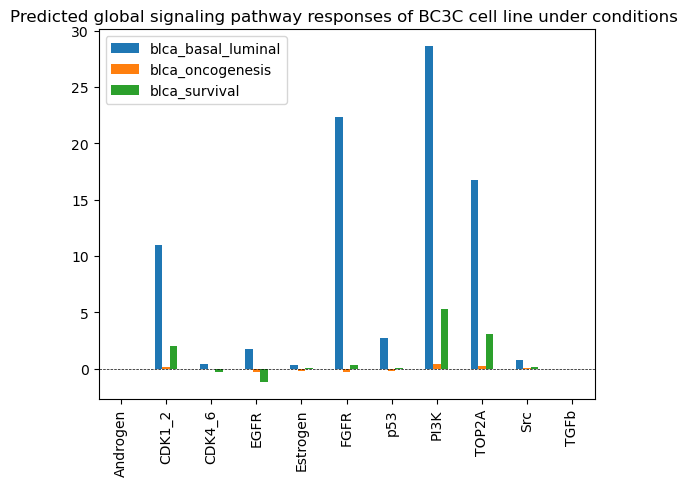

In [21]:
import matplotlib.pyplot as plt
t_df_subset.plot.bar()
plt.axhline(y=0, linestyle='--', color='black',linewidth=0.5)
plt.title(f"Predicted global signaling pathway responses of {cell_line} cell line under conditions ")

In [22]:
display(rm_filt)
rm_subset=rm_filt[['Androgen','CDK1_2', 'CDK4_6', 'EGFR', 'Estrogen', 'FGFR',
       'PI3K', 'p53', 'TOP2A','Src','TGFb']]

,Androgen,CDK1_2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,TGFb,blca_basal_luminal,blca_oncogenesis,blca_survival
Androgen,-1.0,0.000000,0.000000,-0.046845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
CDK1_2,0.0,-1.000000,0.000000,0.120302,0.000000,0.148511,0.227495,0.000000,0.000000,0.065448,0.0,0.0,0.0,0.0
CDK4_6,0.0,0.000000,-1.000000,0.370128,0.000000,0.000000,0.147010,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
EGFR,0.0,0.000000,0.237625,-1.000000,0.000000,0.000000,-0.301517,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.000000,0.000000,-1.000000,0.297213,0.123576,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
FGFR,0.0,0.000000,0.000000,0.345604,0.000000,-1.000000,0.139345,0.123198,0.000000,0.000000,0.0,0.0,0.0,0.0
PI3K,0.0,0.382985,0.000000,-0.208541,0.000000,0.000000,-1.000000,0.000000,0.583898,0.000000,0.0,0.0,0.0,0.0
p53,0.0,0.000000,0.000000,0.200018,0.000000,0.000000,0.122579,-1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.000000,-0.132774,0.000000,0.000000,0.172398,0.000000,-1.000000,0.000000,0.0,0.0,0.0,0.0
Src,0.0,0.000000,0.000000,0.256711,0.459930,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,0.0,0.0,0.0


In [23]:
rm_subset=rm_subset.loc[['blca_basal_luminal',	'blca_oncogenesis',	'blca_survival']]
rm_subset=rm_subset.T
display(rm_subset)

,blca_basal_luminal,blca_oncogenesis,blca_survival
Androgen,0.000000,0.000000,0.000000
CDK1_2,0.000000,0.000000,0.000000
CDK4_6,0.000000,0.000000,0.000000
EGFR,0.000000,0.000000,0.000000
Estrogen,0.000000,-0.231914,0.000000
FGFR,20.582341,-0.281273,0.000000
PI3K,20.214920,0.366933,3.892321
p53,0.000000,-0.222614,0.000000
TOP2A,0.000000,0.000000,0.000000
Src,0.000000,0.000000,0.000000


Text(0.5, 1.0, 'Predicted local signaling pathway responses of BC3C cell line under conditions ')

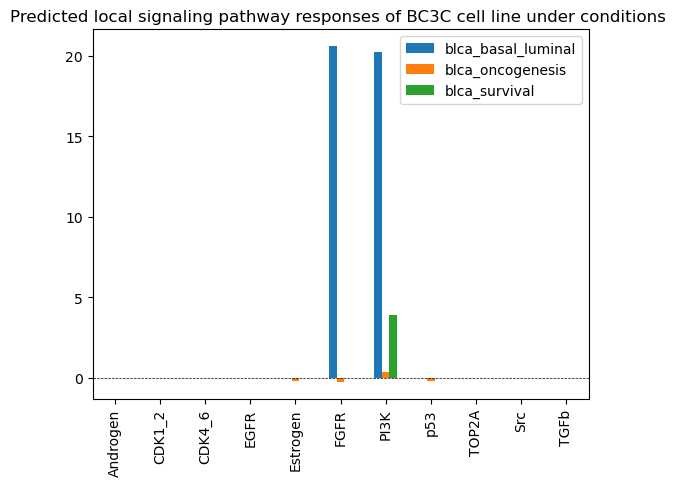

In [24]:
rm_subset.plot.bar()
plt.axhline(y=0, linestyle='--', color='black',linewidth=0.5)
plt.title(f"Predicted local signaling pathway responses of {cell_line} cell line under conditions ")